<a href="https://colab.research.google.com/github/karanpk02/Task5/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 3**

The data is available as two attached CSV files:

* takehome_user_engagement. csv
* takehome_users . csv

The data has the following two tables:

1] A user table ( "takehome_users" ) with data on 12,000 users who signed up   for the product in the last two years. 

 This table includes:

* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one
of 5 values:

  * PERSONAL_PROJECTS: invited to join another user's
personal workspace
  * GUEST_INVITE: invited to an organization as a guest
(limited permissions)
  * ORG_INVITE: invited to an organization (as a full member)
  * SIGNUP: signed up via the website
  * SIGNUP_GOOGLE_AUTH: signed up using Google
* Authentication (using a Google email account for their login
id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
* enabled_for_marketing_drip: whether they are on the regular
marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption .
We suggest spending 1­2 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

###**What is  User engagement**
 User engagement measures how frequently and for how long users interact with your website or application. This metric shows if your audience finds value in your offers, be it a product or service. Companies measure engagement by tracking user interactions like clicks, downloads, and shares.

![alt text](https://wp-cdn.codefuel.com/wp-content/uploads/2021/11/15085028/ultimate-guide.jpg.webp)

In [1]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

###takehome_users = df
###takehome_user_engagement = df1

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/karanpk02/Task5/main/takehome_users.csv", encoding='ISO-8859-1')
df1 = pd.read_csv("https://raw.githubusercontent.com/karanpk02/Task5/main/takehome_user_engagement.csv")

In [3]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df.shape

(12000, 10)

In [6]:
df1.shape

(207917, 3)

In [7]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [8]:
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [9]:
y= df.describe().T
y

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [10]:
x = df1.describe().T
x

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


#DATA TYPES

In [11]:
df.dtypes


object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [12]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

###We can see in the given dataset instead of 'user_id' we have 'object_id'. We want to replace that into `user_id'.  

In [13]:
df.rename(columns = {'object_id':'user_id'}, inplace = True)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


###Change the data type of 'creation_time' and 'last_session_creation_time' into datetime in takehome users dataset.

In [14]:
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [15]:
#df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'])

In [16]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


###In the dataset after run the command `df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'])` which round the valuea of seconds column in dataset. (Just run and see// Here I am not applied that command because if I run the both above and  next commands, it won't work...). So just put one `unit='s'` for consider as second.

In [17]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'] ,unit='s')

In [18]:
df.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


###Change the data type of 'time_stamp' into pandas datetime in takehome users engagement dataset df1.

In [20]:
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])

In [21]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


###Everything converted to proper datetime in takehome users dataset.

# **GROUPING AND ROLLING IN PANDAS**
*******
*******
##**SOME RESULTS IN PANDAS GROUPING AND ROLLING**

###**Syntax for groupby**
****
**`DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)`**
******
**We can see the problem using Titanic Dataset**

In [23]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bvalgard/data/main/titanic.csv', na_values="?")
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


First we have to find in p-class who survived `Single group single column`.
*****

In [24]:
df2.groupby(['pclass'])['survived'].sum()

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

To find in p-class who survived and their fare `multiple columns`.
*****

In [25]:
df2.groupby(['pclass'])['survived','fare'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,survived,fare
pclass,,
1,200,28265.4043
2,119,5866.6374
3,181,9418.4452


To find with respect to pclass and sex who survived `multiple groups`.
*****

In [26]:
df2.groupby(['pclass','sex'])['survived'].sum()

pclass  sex   
1       female    139
        male       61
2       female     94
        male       25
3       female    106
        male       75
Name: survived, dtype: int64

To find the sum and mean of total number and fare of passengers who survived with respect to pclass and sex.  `multiple fungtion`.
*****
 * Here we using `agg` , the aggrigation function.

In [27]:
df2.groupby(['pclass','sex'])['survived'].agg(["sum","mean"])

sum      mean
pclass sex                  
1      female  139  0.965278
       male     61  0.340782
2      female   94  0.886792
       male     25  0.146199
3      female  106  0.490741
       male     75  0.152130

Here, these concepts are applicable only for less number of category or group values. Let's take the 'age' class, this is a categorical set with more number of age group. In such situation we use one method `Category_bins` by `bins` in `cut` function of pandas. First we create another column of `age_bins`. 

In [28]:
df2['age_bins'] = pd.cut(df2['age'], bins=3,labels=('young', 'middle age', 'old'))


In [29]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_bins
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",middle age
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",young
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",middle age
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [30]:
df2.groupby(['age_bins'])['survived'].sum()


age_bins
young         199
middle age    200
old            28
Name: survived, dtype: int64

###**Syntax for rolling**
***
**`DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')`**
*****


In [31]:
import numpy as np
import random
#Generate 5 random numbers between 10 and 30
# randomlist = random.sample(range(10, 30), 5)
# print(randomlist)

In [32]:
dates = pd.date_range(start='2022-08-01', end='2022-08-31', freq='d').to_list()
numbers = random.sample(range(1, 50), 31)
# print(len(dates))

df2 = pd.DataFrame({'Dates':dates, 'Price':numbers})

In [33]:
df2.head(10)

,Dates,Price
0,2022-08-01,6
1,2022-08-02,23
2,2022-08-03,41
3,2022-08-04,2
4,2022-08-05,21
5,2022-08-06,43
6,2022-08-07,42
7,2022-08-08,36
8,2022-08-09,39
9,2022-08-10,12


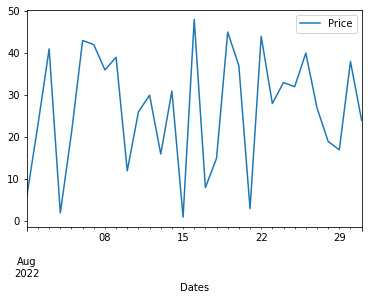

In [34]:
df2.plot.line(x='Dates', y ='Price')

if we run the command `df2['moving_averges'] = df2['Price'].rolling().mean()`, it gives an error.
`---------------------------------------------------------------------------

TypeError                                 Traceback (most recent call last)
<ipython-input-80-2f04e1f055b7> in <module>()
----> 1 df2['moving_averges'] = df2['Price'].rolling().mean()

TypeError: rolling() missing 1 required positional argument: 'window'

In [35]:
df2['moving_averges'] = df2['Price'].rolling(window=5).mean()
df2.head(10)

,Dates,Price,moving_averges
0,2022-08-01,6,NaN
1,2022-08-02,23,NaN
2,2022-08-03,41,NaN
3,2022-08-04,2,NaN
4,2022-08-05,21,18.6
5,2022-08-06,43,26.0
6,2022-08-07,42,29.8
7,2022-08-08,36,28.8
8,2022-08-09,39,36.2
9,2022-08-10,12,34.4


#### The reason for the missing values is because, by default pandas will use the outer values as the starting points. The first non missing value is the mean of first five values (mean of elements from 0 to 4). In the second value vill be the mean of next 5 (mean of elements from 1 to 5) values from 2nd element as window size defined. 

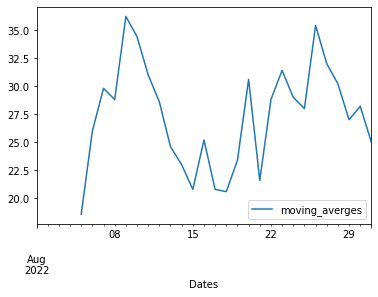

In [36]:
df2.plot.line(x ='Dates', y ='moving_averges')

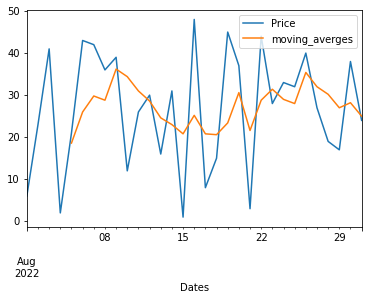

In [37]:
df2.plot.line(x ='Dates', y =['Price', 'moving_averges'])

#### It is looking like much more smoother. That is, the moving averages smoothes out the variation in the data set quite a bit by allowing us ignore some of the variations simply by calculating the average of these values.

In [38]:
df2['rolling averge center'] = df2['Price'].rolling(window=4, center = True).mean()
df2.head(10)

,Dates,Price,moving_averges,rolling averge center
0,2022-08-01,6,NaN,NaN
1,2022-08-02,23,NaN,NaN
2,2022-08-03,41,NaN,18.00
3,2022-08-04,2,NaN,21.75
4,2022-08-05,21,18.6,26.75
5,2022-08-06,43,26.0,27.00
6,2022-08-07,42,29.8,35.50
7,2022-08-08,36,28.8,40.00
8,2022-08-09,39,36.2,32.25
9,2022-08-10,12,34.4,28.25


By using center here its find the mean of 5 values and substitute the value to center element(that is 3rd). Now also we have `Nan` values present in the first two rows. For this we find another solution.

###Min-period feature to rolling function
****
In my data, if we have a missing value it will affect my data output also. Let's we add two missing value in my data.


In [39]:
df2.iloc[5:7, 1] = np.NaN #Put NaN in the 5th and 6th row of 2nd column
df2.head(10)

,Dates,Price,moving_averges,rolling averge center
0,2022-08-01,6.0,NaN,NaN
1,2022-08-02,23.0,NaN,NaN
2,2022-08-03,41.0,NaN,18.00
3,2022-08-04,2.0,NaN,21.75
4,2022-08-05,21.0,18.6,26.75
5,2022-08-06,NaN,26.0,27.00
6,2022-08-07,NaN,29.8,35.50
7,2022-08-08,36.0,28.8,40.00
8,2022-08-09,39.0,36.2,32.25
9,2022-08-10,12.0,34.4,28.25


By default if we try to do the experiment with min-period equals 5.

In [40]:
df2['min Period'] = df2['Price'].rolling(5,min_periods=5).mean()
df2.head(10)

,Dates,Price,moving_averges,rolling averge center,min Period
0,2022-08-01,6.0,NaN,NaN,NaN
1,2022-08-02,23.0,NaN,NaN,NaN
2,2022-08-03,41.0,NaN,18.00,NaN
3,2022-08-04,2.0,NaN,21.75,NaN
4,2022-08-05,21.0,18.6,26.75,18.6
5,2022-08-06,NaN,26.0,27.00,NaN
6,2022-08-07,NaN,29.8,35.50,NaN
7,2022-08-08,36.0,28.8,40.00,NaN
8,2022-08-09,39.0,36.2,32.25,NaN
9,2022-08-10,12.0,34.4,28.25,NaN


In the min-period column also we have most of the values are `NaN`. It's due to the window size and min-period are same. So choose a small min-period which is less than the window size.

In [41]:
df2['min Period'] = df2['Price'].rolling(5,min_periods=2).mean()
df2.head(10)

,Dates,Price,moving_averges,rolling averge center,min Period
0,2022-08-01,6.0,NaN,NaN,NaN
1,2022-08-02,23.0,NaN,NaN,14.500000
2,2022-08-03,41.0,NaN,18.00,23.333333
3,2022-08-04,2.0,NaN,21.75,18.000000
4,2022-08-05,21.0,18.6,26.75,18.600000
5,2022-08-06,NaN,26.0,27.00,21.750000
6,2022-08-07,NaN,29.8,35.50,21.333333
7,2022-08-08,36.0,28.8,40.00,19.666667
8,2022-08-09,39.0,36.2,32.25,32.000000
9,2022-08-10,12.0,34.4,28.25,29.000000


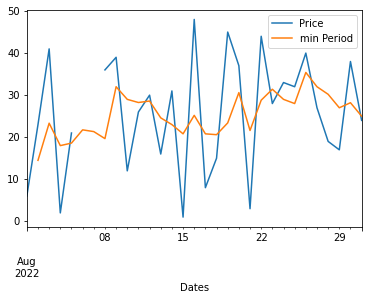

In [42]:
df2.plot.line(x='Dates', y = ['Price', 'min Period'])

Here we have no only one NaN values. Because in each window size they find the mean of non-missing values with min-period size(ex: In a column of window size 5 and min-period 2, we have $[NaN, 2, NaN,24,18]$. In this case they choose the mean of two non-NaN values.) Similarly in a rolling function we can find sum, median, mode and all operations.

#**CONTINUE WITH ASSIGNMENT**

First we are going to **Count similar events in the previous 7 days**. So, here we applying the groupby and rolling functions.
Reference from **stackoverflow**. 
[link text](https://stackoverflow.com/questions/61743170/count-similar-events-in-the-previous-7-days)

In [43]:
tx_count = df1.set_index('time_stamp').groupby("user_id").rolling("7D").count()
tx_count.columns=["visits_in_7_days"]
df1 = tx_count.reset_index()
df1.head(10)

,user_id,time_stamp,visits_in_7_days
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
5,2,2013-12-31 03:45:04,2.0
6,2,2014-01-08 03:45:04,1.0
7,2,2014-02-03 03:45:04,1.0
8,2,2014-02-08 03:45:04,2.0
9,2,2014-02-09 03:45:04,3.0


Now, **get the row(s) which have the max value in groups** using groupby, reference from **stack overflow**
[link text](https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby)

In [44]:
idx = df1.groupby('user_id')['visits_in_7_days'].max()
df1 = idx.reset_index() #change index everytime
df1.head(10)

,user_id,visits_in_7_days
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,10,7.0
8,11,1.0
9,13,1.0


The given values in the columns are float we have to convert them from floats to ints. Because, we are taking the number of visits which is a countable list of data.

In [45]:
df1['visits_in_7_days'] = df1['visits_in_7_days'].astype(int)
df1.head()

,user_id,visits_in_7_days
0,1,1
1,2,3
2,3,1
3,4,1
4,5,1


By definition an **"adopted user"** as a user who has logged into the product **on three separate days** in at least one seven­day period.

In [46]:
df1['adopted_user'] = df1['visits_in_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [47]:
df1.head()

,user_id,visits_in_7_days,adopted_user
0,1,1,0
1,2,3,1
2,3,1,0
3,4,1,0
4,5,1,0


Now, we can drop the column `visits_in_7_days`.

In [48]:
df1.drop("visits_in_7_days", axis=1, inplace=True)
df1.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [49]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


Now, we can **merge the columns of both dataframe with common id**. Reference from **Stack Overflow** [link text](https://stackoverflow.com/questions/41463119/join-two-dataframes-on-common-column-in-python).

In [50]:
df = pd.merge(df, df1.rename(columns={'user_id':'user_id'}), on='user_id',  how='left')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


#**ANALYSIS ON NEW MERGED DATA FRAME**

In [51]:
df.head(10)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [53]:
for col in df:
    print(col,len(df[col].unique()))

user_id 12000
creation_time 11996
name 11355
email 11980
creation_source 5
last_session_creation_time 8822
opted_in_to_mailing_list 2
enabled_for_marketing_drip 2
org_id 417
invited_by_user_id 2565
adopted_user 3


###**Drop some meanigless id columns**

In [54]:
df.drop(['user_id', 'name', 'email', 'invited_by_user_id'], axis = 1, inplace = True)

In [55]:
df

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0.0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1.0
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0.0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0.0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0.0
...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,0.0
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,0.0
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0


###**Take the time difference in days and drop the date time columns**

In [56]:
df['time_difference'] = (df.last_session_creation_time.max()-df.creation_time).dt.days

In [57]:
df.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)

In [58]:
df

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,time_difference
0,GUEST_INVITE,1,0,11,0.0,45
1,ORG_INVITE,0,0,1,1.0,203
2,ORG_INVITE,0,0,94,0.0,443
3,GUEST_INVITE,0,0,1,0.0,381
4,GUEST_INVITE,0,0,193,0.0,505
...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0.0,273
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,511
11997,GUEST_INVITE,1,1,83,0.0,40
11998,PERSONAL_PROJECTS,0,0,6,0.0,736


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   adopted_user                8823 non-null   float64
 5   time_difference             12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


In [60]:
df.adopted_user.fillna(0, inplace=True)

In [61]:
# df.time_difference.fillna(0, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   adopted_user                12000 non-null  float64
 5   time_difference             12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


###**One hot encoding on creation source**

In [63]:
df = pd.get_dummies(df, columns = ['creation_source'])

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
adopted_user,12000.0,0.133500,0.340128,0.0,0.0,0.0,0.00,1.0
time_difference,12000.0,324.568000,216.646173,6.0,129.0,304.0,506.00,736.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP_GOOGLE_AUTH,12000.0,0.115417,0.319537,0.0,0.0,0.0,0.00,1.0


In [65]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'adopted_user', 'time_difference', 'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']


##**Splitting the dataset into the Training set and Test set**

In [66]:
b.remove('adopted_user')

In [67]:
X = df[b].values#array of features
y = df['adopted_user'].values

Class 0: 10398
Class 1: 1602
Percentage of data in class 0 is  86.65 %


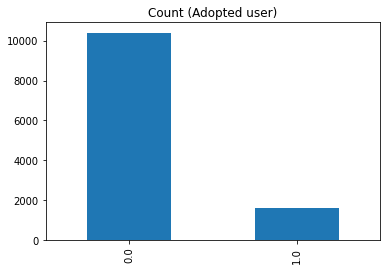

In [68]:
df1=df.adopted_user.value_counts()
print('Class 0:', df1[0])
print('Class 1:', df1[1])
print('Percentage of data in class 0 is ', round(df1[0] * 100 / (df1[1] + df1[0]), 2),'%')
df1.plot(kind='bar', title='Count (Adopted user)');

More than 70% of data lies in class 0. So, this is an **unbalanced problem**. So we need to balance the given data.

#**Models**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=43)

In [70]:
!pip install imblearn
import imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [72]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)



In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)



In [74]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
print(np.count_nonzero(y_train==1))
print(np.count_nonzero(y_train==0))

3800
3800


**Feature Scaling**

In [76]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

##**MODELS**

###**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_scaled,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
logistic_regression.coef_

array([[-0.14110104, -0.08746431,  0.4127351 ,  0.51834942, -0.69002881,
        -0.94797223, -0.9870593 , -0.79012772, -0.65698327]])

In [79]:
logistic_regression.intercept_

array([0.05153572])

In [80]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
4195,0.0,1.0
4196,1.0,1.0
4197,0.0,0.0
4198,0.0,0.0


**Evaluating The Predection**

In [81]:
from sklearn.model_selection import cross_val_score
print("Train Accuracy : ", logistic_regression.score(X_train_scaled,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(logistic_regression, X_train_scaled, y_train, cv=10)))

Train Accuracy :  0.765921052631579
Val Accuracy :  0.7617105263157894


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3268,  367],
       [ 472,   93]])

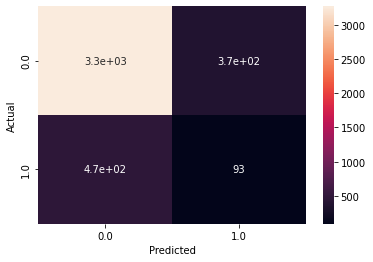

In [83]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

###**KNN neighbours**

In [84]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model

K value  :  1  score :  0.8886842105263156
K value  :  2  score :  0.8839473684210526
K value  :  3  score :  0.8553947368421053
K value  :  4  score :  0.8578947368421053
K value  :  5  score :  0.8430263157894735
K value  :  6  score :  0.8428947368421053
K value  :  7  score :  0.8248684210526317
K value  :  8  score :  0.8225
K value  :  9  score :  0.8156578947368421
K value  :  10  score :  0.8173684210526316
K value  :  20  score :  0.7902631578947369
K value  :  50  score :  0.7690789473684209


In [85]:
knn = KNeighborsClassifier(4) #initialising the model
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
from sklearn.model_selection import cross_val_score
print("Train Accuracy : ", knn.score(X_train_scaled,y_train)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

Train Accuracy :  0.9253947368421053
Val Accuracy :  0.8578947368421053


In [87]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4195,0.0,1.0
4196,1.0,0.0
4197,0.0,0.0
4198,0.0,0.0


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3099,  536],
       [ 463,  102]])

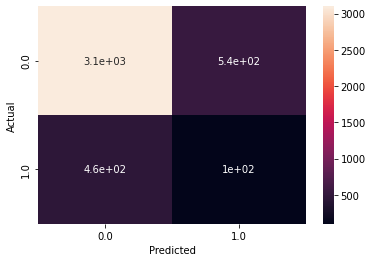

In [89]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

###**RANDOM FOREST**

**Fitting the Random Forest model**

In [90]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3)

# Train the model on training data
rf.fit(X_train_scaled, y_train);

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_scaled)

# # Calculate the absolute errors
# errors = abs(predictions - original_test_labels)

# # Print out the mean absolute error (mae)
# print('MAE :', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
# improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
# print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

#r2_score(baseline_preds, original_test_labels)


In [91]:
training_score = rf.score(X_train_scaled,y_train)*100
print("Train data score is :",training_score)

Train data score is : 73.73684210526315


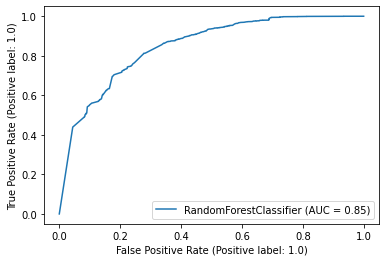

In [92]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf,X_train_scaled,y_train)

85% accuracy in random forest

In [93]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,1.0
...,...,...
4195,0.0,1.0
4196,1.0,1.0
4197,0.0,1.0
4198,0.0,0.0


In [94]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
# f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
# rf.roc_auc_score(y_test, y_pred)
confusion_matrix(y_test,y_pred)

array([[1868, 1767],
       [ 176,  389]])

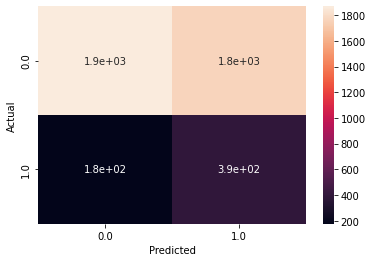

In [95]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

# Interpret Model Results

In [96]:
from sklearn import tree

In [97]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = b, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [98]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 3


In [99]:
# Limit depth of tree to 2 levels
rf_small = RandomForestClassifier(n_estimators=20, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[3]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'rando_for.dot', feature_names = b, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('rando_for.dot')

graph.write_png('rando_for.png')

The out put become,
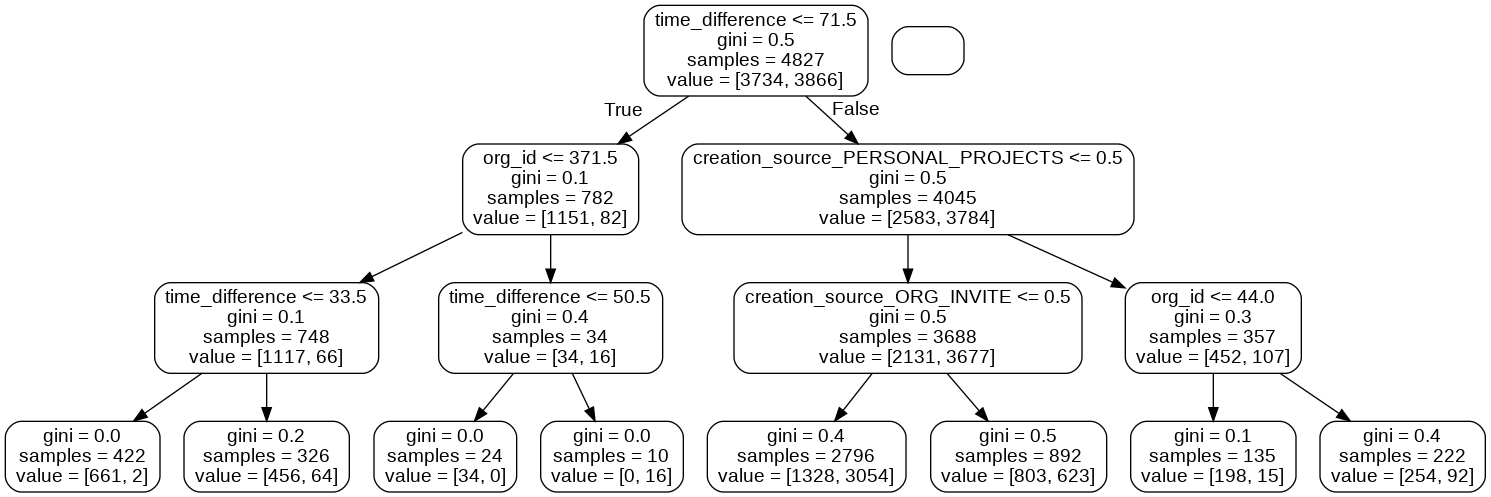

# Variable Importances

In [100]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(b, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: time_difference      Importance: 0.51
Variable: creation_source_PERSONAL_PROJECTS Importance: 0.18
Variable: org_id               Importance: 0.11
Variable: creation_source_ORG_INVITE Importance: 0.09
Variable: creation_source_SIGNUP Importance: 0.05
Variable: opted_in_to_mailing_list Importance: 0.02
Variable: enabled_for_marketing_drip Importance: 0.02
Variable: creation_source_SIGNUP_GOOGLE_AUTH Importance: 0.02
Variable: creation_source_GUEST_INVITE Importance: 0.0


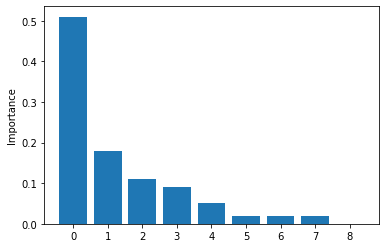

In [101]:
import numpy as np
import matplotlib.pyplot as plt
feature_importances.sort(key=lambda x: x[1], reverse=True)
feature_importances
feature = list(zip(*feature_importances))[0]
importance = list(zip(*feature_importances))[1]
x=np.arange(len(feature))
plt.bar(x,importance,align='center')
plt.xticks(x,x) 
plt.ylabel('Importance')
plt.show()

That is, gender has no importance.